#### Import Necessary Llibraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv(r"https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [2]:
# let's check null values
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [3]:
# imporing libraries
import nltk
import re
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Sentiment Analysis of Flipkart

In [4]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,
                values=quantity,
                names=numbers, hole=0.5)
figure.show()

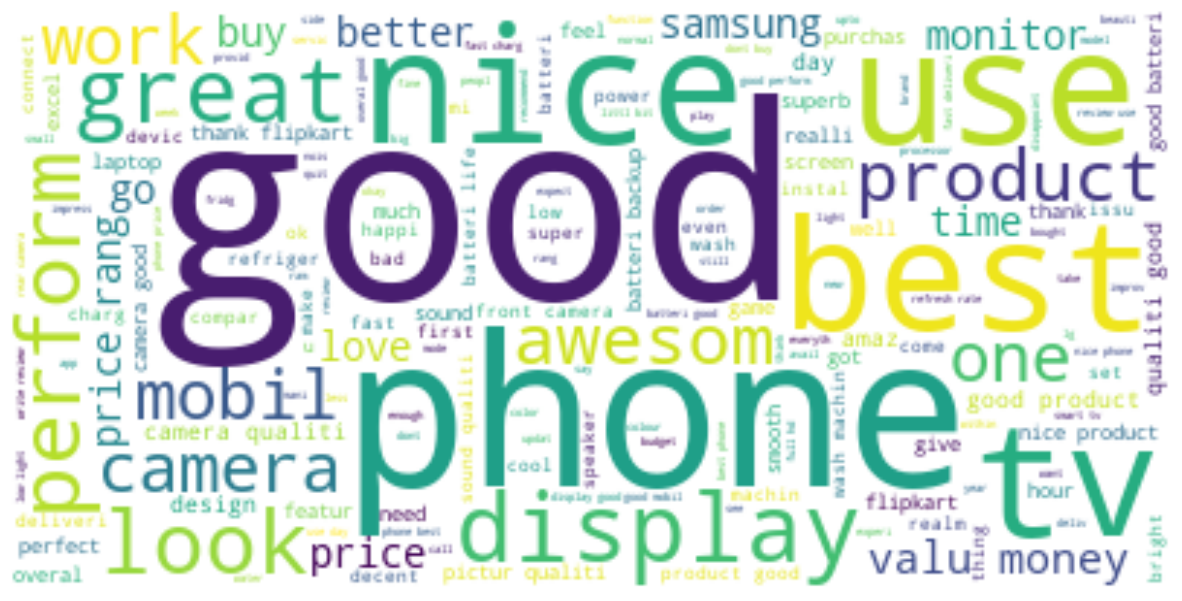

In [5]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
wordcloud.words_

{'good': 1.0,
 'phone': 0.5357483317445186,
 'use': 0.2859866539561487,
 'nice': 0.28503336510962823,
 'tv': 0.27931363203050524,
 'best': 0.27073403241182076,
 'display': 0.2430886558627264,
 'great': 0.21544327931363202,
 'look': 0.20591039084842708,
 'perform': 0.2049571020019066,
 'product': 0.1982840800762631,
 'awesom': 0.19351763584366063,
 'mobil': 0.18493803622497618,
 'camera': 0.18303145853193517,
 'one': 0.1811248808388942,
 'work': 0.17635843660629172,
 'valu money': 0.15919923736892277,
 'monitor': 0.14489990467111535,
 'go': 0.14108674928503337,
 'price rang': 0.13536701620591038,
 'price': 0.1334604385128694,
 'buy': 0.1315538608198284,
 'time': 0.12869399428026693,
 'better': 0.12869399428026693,
 'samsung': 0.12106768350810296,
 'love': 0.12011439466158245,
 'camera qualiti': 0.11820781696854146,
 'good product': 0.11534795042897998,
 'day': 0.111534795042898,
 'amaz': 0.11058150619637751,
 'design': 0.10867492850333652,
 'qualiti good': 0.10867492850333652,
 'thank f

In [7]:
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thars\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Review  Positive  Negative  \
0  best  great performancei got around  backup bi...     0.395     0.101   
1                                        good perfom     0.744     0.000   
2  great perform usual also game laptop issu batt...     0.277     0.000   
3                        wife happi best product 👌🏻😘     0.512     0.000   
4  light weight laptop new amaz featur batteri li...     0.000     0.000   

   Neutral  
0    0.504  
1    0.256  
2    0.723  
3    0.488  
4    1.000  


In [9]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiments_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊")
    elif (b>a) and (b>c):
        print("Negative 😠")
    else:
        print("Neutral 🙂")

sentiments_score(x, y, z)

Neutral 🙂


In [10]:
print(f"Positive: {x}")   # we can also use print("Positive: {}"".format(x))
print(f"Negative: {y}")
print(f"Neutral: {z}")

Positive: 923.553
Negative: 96.775
Neutral: 1283.688


:-)
